# MODELLING

## Data Diri
* Nama     :
  * Yusriyah Isnaini Mufidah
  * Shinta Nuriyah Arief (Tidak Mengerjakan)
  * Damar Jati Bayuaji (Tidak Mengerjakan)
* Kelas    : AMIKOM01
* Kelompok : 2
* Tema Project Kelompok : Healthcare (Kesehatan)

## Deskripsi Masalah / Bisnis Understanding
Tema project yang dieksplorasi dalam Tugas Akhir ini adalah healthcare atau
kesehatan. Secara spesifik fokus Tugas Akhir ini adalah berkaitan dengan
pergerakan data Covid 19 di Indonesia yang dapat ditemukan di [Data Riset dan
Teknologi Covid-19 Indonesia](https://docs.google.com/spreadsheets/d/1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw/edit#gid=1814790353).

Perkembangan kasus-kasus baru pasien Covid-19 di Indonesia masih terus
dilaporkan meski pandemi telah berlangsung selama hampir dua tahun. Pandemi
dengan berbagai pembatasan untuk mencegah penularan membuat banyak orang
menantikan waktu ketika kehidupan bisa kembali normal. Jadi disinilah sebuah
metode yaitu prediksi kasus covid 19 dilakukan. Metode ini merupakan sebuah cara
untuk menentukan atau meramal jumlah kasus covid 19 Indonesia di masa depan.
Tema spesifik ini dapat dicapai dengan cara menggunakan analisis teknikal
menggunakan informasi dari paparan medis serta melibatkan intuisi dalam
meramalnya, tetapi metode yang lebih tepat adalah menggunakan perantara
machine learning atau pembelajaran mesin yang dapat melakukan prediksi kasus
covid 19 dengan tingkat akurasi yang sangat tinggi.

Hal tersebut terbukti dari banyaknya penelitian yang membuktikan kemampuan
machine learning dalam memprediksi kasus covid 19, diantaranya:
* Leeuwenberg, A. M., & Schuit, E. (2020). Prediction models for COVID-19
clinical decision making. The Lancet Digital Health, 2(10), e496-e497.
* Sperrin, M., & McMillan, B. (2020). Prediction models for covid-19 outcomes.
* Shao, N., Zhong, M., Yan, Y., Pan, H., Cheng, J., & Chen, W. (2020). Dynamic
models for Coronavirus Disease 2019 and data analysis. Mathematical
Methods in the applied sciences, 43(7), 4943-4949.

## Kebutuhan Masalah
1. Apakah machine learning dapat diimplementasikan untuk memprediksi kasus
Covid 19?
2. Bagaimana performa dari perbanding 3 model machine learning yaitu LSTM,
Linear Regression dan Support Vectore Regression dalam memprediksi
kasus Covid 19?

## Goals
- Dapat mengimplementasikan model machine learning yang dilatih menggunakan data lampau serta memprediksi kasus covid 19.
- Mengevaluasi performa dari machine learning dan membandingkannya satu sama lain menggunakan metrik evaluasi regresi.

## Solution statements
Dalam kasus ini kita memiliki 3 model yang berbeda, dari yang sederhana sampai kompleks, diantaranya:
- **Linear Regression**. Model ini merupakan algoritma yang melakukan pemodelan dari hubungan dua variabel dengan proses fitting 
equasi linear terhadap data yang diobservasi. Model ini digunakan untuk memprediksi nilai suatu variable berdasarkan nilai dari variable lainnya. Nilai yang diprediksi merupakan variabel yang dependen, sedangkan nilai variable yang digunakan untuk memprediksi merupakan variabel independen. 
- **Support Vector Regression**. Mekanisme dari SVR ini yaitu dengan mencari garis fit terbaik atau sebuah hyperplane yang dianggap paling optimal dalam memprediksi nilai-nilai dari data kontinu dengan memetakan data yang terurut dengan pemisahan data berdasarkan margin (hyperplane) terbaik.
- **Long Short-Term Memory**. Model ini berbasis jaringan syaraf tiruan dan varian dari recurrent neural network (RNN). yang berkemampuan untuk mempelajari urutan kebergantungan dari sebuah data sekuensial
- Mengevaluasi performa dari machine learning dan membandingkannya satu sama lain menggunakan metrik evaluasi regresi.

# Prediksi kasus covid 19 di Indonesia

## Import Libraries

In [3]:
#import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
# import keras
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation
# from keras.layers.recurrent import LSTM
# from keras.models import load_model
# from keras import backend as K
import math, time
import itertools
from math import sqrt
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [13]:
# load dataset
df = pd.read_csv('COVID-19_Indonesia_Daily.csv')
df

,Status,Tanggal_YMD,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,Terkonfirmasi,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Terkonfirmasi,2020-03-16,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Terkonfirmasi,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Terkonfirmasi,2020-03-18,NaN,NaN,4.0,NaN,NaN,1.0,30.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Terkonfirmasi,2020-03-19,NaN,NaN,10.0,NaN,NaN,2.0,52.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Sembuh,2021-09-29,74.0,180.0,49.0,90.0,8.0,125.0,193.0,27.0,...,132.0,46.0,57.0,11.0,2.0,6.0,109.0,28.0,108.0,11.0
1679,Meninggal,2021-09-29,10.0,7.0,1.0,1.0,0.0,5.0,6.0,1.0,...,3.0,3.0,4.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0
1680,Terkonfirmasi,2021-09-30,40.0,86.0,59.0,62.0,2.0,67.0,149.0,18.0,...,43.0,31.0,42.0,2.0,4.0,1.0,15.0,10.0,52.0,3.0
1681,Sembuh,2021-09-30,101.0,229.0,87.0,74.0,10.0,190.0,194.0,9.0,...,63.0,26.0,117.0,13.0,15.0,11.0,5.0,15.0,52.0,4.0


In [5]:
# hitung jumlah nilai null pada dataset
df.isna().sum()

Status           0
Tanggal_YMD      0
Aceh           560
Bali           188
Banten         267
Babel          523
Bengkulu       552
DIY            226
Jakarta         40
Jambi          602
Jabar          123
Jateng         132
Jatim           31
Kalbar         646
Kaltim         190
Kalteng        387
Kalsel         180
Kaltara        584
Kep Riau       488
NTB            353
Sumsel         175
Sumbar         248
Sulut          374
Sumut          168
Sultra         494
Sulsel         220
Sulteng        490
Lampung        382
Riau           257
Malut          728
Maluku         649
Papbar         517
Papua          670
Sulbar         648
NTT            627
Gorontalo      640
dtype: int64

In [14]:
# Mengisi data yang kosong dengan angka 0
df = df.fillna(0)
df

,Status,Tanggal_YMD,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,Terkonfirmasi,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Terkonfirmasi,2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Terkonfirmasi,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Terkonfirmasi,2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Terkonfirmasi,2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Sembuh,2021-09-29,74.0,180.0,49.0,90.0,8.0,125.0,193.0,27.0,...,132.0,46.0,57.0,11.0,2.0,6.0,109.0,28.0,108.0,11.0
1679,Meninggal,2021-09-29,10.0,7.0,1.0,1.0,0.0,5.0,6.0,1.0,...,3.0,3.0,4.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0
1680,Terkonfirmasi,2021-09-30,40.0,86.0,59.0,62.0,2.0,67.0,149.0,18.0,...,43.0,31.0,42.0,2.0,4.0,1.0,15.0,10.0,52.0,3.0
1681,Sembuh,2021-09-30,101.0,229.0,87.0,74.0,10.0,190.0,194.0,9.0,...,63.0,26.0,117.0,13.0,15.0,11.0,5.0,15.0,52.0,4.0


In [15]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,...,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,43.783125,133.181818,155.722519,60.327392,27.302436,183.096257,1018.246583,34.866310,833.113488,570.696376,...,54.522282,57.512181,151.178253,14.109329,17.166964,27.158051,39.025550,14.294712,74.126560,13.868093
std,89.177540,254.302574,508.725943,119.902737,61.978963,410.407208,2115.221941,76.348639,1667.479441,1059.530328,...,144.012348,117.934232,262.594338,39.511312,38.894535,65.986910,188.841892,33.035489,217.827158,30.223550
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,2.000000,0.000000,0.000000,3.000000,20.000000,0.000000,10.000000,18.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,48.000000,21.000000,4.000000,3.000000,22.000000,266.000000,3.000000,120.000000,162.000000,...,4.000000,8.000000,29.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,40.500000,137.500000,106.500000,69.500000,25.500000,191.500000,1093.000000,36.000000,975.000000,618.500000,...,34.000000,67.000000,181.000000,9.000000,17.000000,24.000000,35.000000,10.000000,43.000000,12.500000
max,1033.000000,2124.000000,8044.000000,862.000000,520.000000,3378.000000,20602.000000,735.000000,18803.000000,7966.000000,...,1566.000000,1447.000000,2205.000000,458.000000,349.000000,735.000000,5588.000000,329.000000,3598.000000,278.000000


## Data Preprocessing

Pada pre-processing data, saya menambahkan kolom baru yaitu Total Kasus, yang merupakan total kasus harian Covid 19 di Indonesia

In [16]:
df["Total Kasus"] = df.sum(axis = 1, skipna = True)

C:\Users\yusri\AppData\Local\Temp\ipykernel_82780\1468456738.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total Kasus"] = df.sum(axis = 1, skipna = True)


In [17]:
# Add Column Total Case
# Drop Column Tanggal
# df = df.drop(columns='Tanggal', axis=1)

# renaming ObservationDate to Date and Country/Region to Country.
df.rename(columns={'Tanggal_YMD': 'Date'}, inplace=True)
df.tail()

,Status,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Total Kasus
1678,Sembuh,2021-09-29,74.0,180.0,49.0,90.0,8.0,125.0,193.0,27.0,...,46.0,57.0,11.0,2.0,6.0,109.0,28.0,108.0,11.0,3077.0
1679,Meninggal,2021-09-29,10.0,7.0,1.0,1.0,0.0,5.0,6.0,1.0,...,3.0,4.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0,117.0
1680,Terkonfirmasi,2021-09-30,40.0,86.0,59.0,62.0,2.0,67.0,149.0,18.0,...,31.0,42.0,2.0,4.0,1.0,15.0,10.0,52.0,3.0,1690.0
1681,Sembuh,2021-09-30,101.0,229.0,87.0,74.0,10.0,190.0,194.0,9.0,...,26.0,117.0,13.0,15.0,11.0,5.0,15.0,52.0,4.0,2848.0
1682,Meninggal,2021-09-30,10.0,5.0,1.0,2.0,0.0,5.0,3.0,0.0,...,3.0,2.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,113.0


In [18]:
# Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()
# df.to_excel(r'File Name.xlsx', sheet_name='Sheet1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       1683 non-null   object 
 1   Date         1683 non-null   object 
 2   Aceh         1683 non-null   float64
 3   Bali         1683 non-null   float64
 4   Banten       1683 non-null   float64
 5   Babel        1683 non-null   float64
 6   Bengkulu     1683 non-null   float64
 7   DIY          1683 non-null   float64
 8   Jakarta      1683 non-null   float64
 9   Jambi        1683 non-null   float64
 10  Jabar        1683 non-null   float64
 11  Jateng       1683 non-null   float64
 12  Jatim        1683 non-null   float64
 13  Kalbar       1683 non-null   float64
 14  Kaltim       1683 non-null   float64
 15  Kalteng      1683 non-null   float64
 16  Kalsel       1683 non-null   float64
 17  Kaltara      1683 non-null   float64
 18  Kep Riau     1683 non-null   float64
 19  NTB   

## Exploratory Analysis

In [21]:
# Let's get the total Confirmed, Deaths and Recovered cases in Indonesia (till 2021-09-30).
# Here, I have done groupby Status.
corona_df = df.groupby("Status")

corona_confirmed_total_df = corona_df.get_group('Terkonfirmasi').sum()
corona_deaths_total_df = corona_df.get_group('Meninggal').sum()
corona_recovered_total_df = corona_df.get_group('Sembuh').sum()
corona_dict = {'Kasus Terkonfirmasi di Indonesia': corona_confirmed_total_df['Total Kasus'],
               'Kasus Meninggal di Indonesia': corona_deaths_total_df['Total Kasus'],
               'Kasus Sembuh di Indonesia': corona_recovered_total_df['Total Kasus']}
corona_dict = pd.DataFrame.from_dict(
    corona_dict, orient='index', columns=['Total Kasus'])

corona_dict.style.background_gradient(cmap='Blues')

,Total Kasus
Kasus Terkonfirmasi di Indonesia,4214839.000000
Kasus Meninggal di Indonesia,141903.000000
Kasus Sembuh di Indonesia,4036831.000000


In [20]:
!pip install Jinja2

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)


You should consider upgrading via the 'C:\Users\yusri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


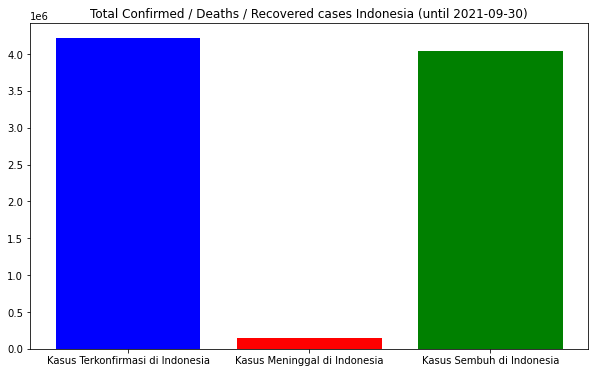

In [10]:
# Graphic illustrates Total cases in the world.
corona_dict = corona_dict.head(3)
x = corona_dict.index
y = corona_dict['Total Kasus'].values

plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(x, y, color=['blue', 'red', 'green'])
plt.title('Total Confirmed / Deaths / Recovered cases Indonesia (until 2021-09-30)')
plt.show()

<ipython-input-11-6228f8f2efe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_confirmed_sorted_df['max'] = corona_confirmed_sorted_df.groupby('Status')['Total Kasus'].transform('max')


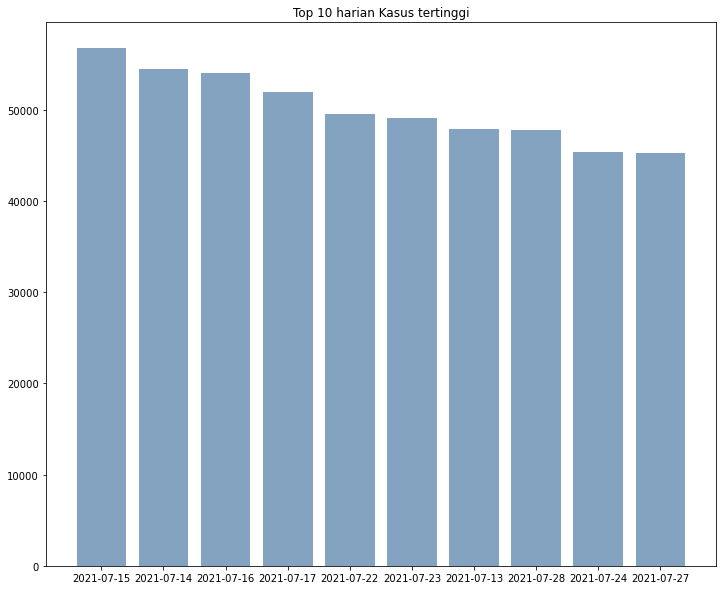

In [11]:
# Top 10  Kasus Terkonfirmasi Harian tertinggi

# corona_diff_df = df[df.Status=='Terkonfirmasi']
corona_confirmed_sorted_df = df[df.Status=='Terkonfirmasi']

corona_confirmed_sorted_df['max'] = corona_confirmed_sorted_df.groupby('Status')['Total Kasus'].transform('max')
corona_confirmed_sorted_df = corona_confirmed_sorted_df.sort_values(["max","Total Kasus"], ascending=False).drop('max', axis=1)
sorted_By_Confirmed1 = corona_confirmed_sorted_df.head(10)
plt.rcParams['figure.figsize'] = (12, 10)
plt.bar(sorted_By_Confirmed1['Date'], sorted_By_Confirmed1['Total Kasus'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 10 harian Kasus tertinggi')
plt.show()

In [12]:
# Table that illustrates increasing infections cases in Indonesia per day.
region = ['Aceh', 'Bali', 'Banten', 'Babel', 'Bengkulu', 'DIY', 'Jakarta',
'Jambi', 'Jabar', 'Jateng', 'Jatim', 'Kalbar', 'Kaltim', 'Kalteng',
'Kalsel', 'Kaltara', 'Kep Riau', 'NTB', 'Sumsel', 'Sumbar', 'Sulut',
'Sumut', 'Sultra', 'Sulsel', 'Sulteng', 'Lampung', 'Riau', 'Malut',
'Maluku', 'Papbar', 'Papua', 'Sulbar', 'NTT', 'Gorontalo']

corona_confirmed_daily = corona_confirmed_sorted_df.drop(columns=region, axis=1)
corona_confirmed_daily.style.background_gradient(cmap='Reds')

,Status,Date,Total Kasus
1449,Terkonfirmasi,2021-07-15,56757.000000
1446,Terkonfirmasi,2021-07-14,54517.000000
1452,Terkonfirmasi,2021-07-16,54000.000000
1455,Terkonfirmasi,2021-07-17,51952.000000
1470,Terkonfirmasi,2021-07-22,49509.000000
1473,Terkonfirmasi,2021-07-23,49071.000000
1443,Terkonfirmasi,2021-07-13,47899.000000
1488,Terkonfirmasi,2021-07-28,47791.000000
1476,Terkonfirmasi,2021-07-24,45416.000000
1485,Terkonfirmasi,2021-07-27,45203.000000


Blue : Confirmed Cases 
Red : Death Cases 
Green : Recovered Cases 


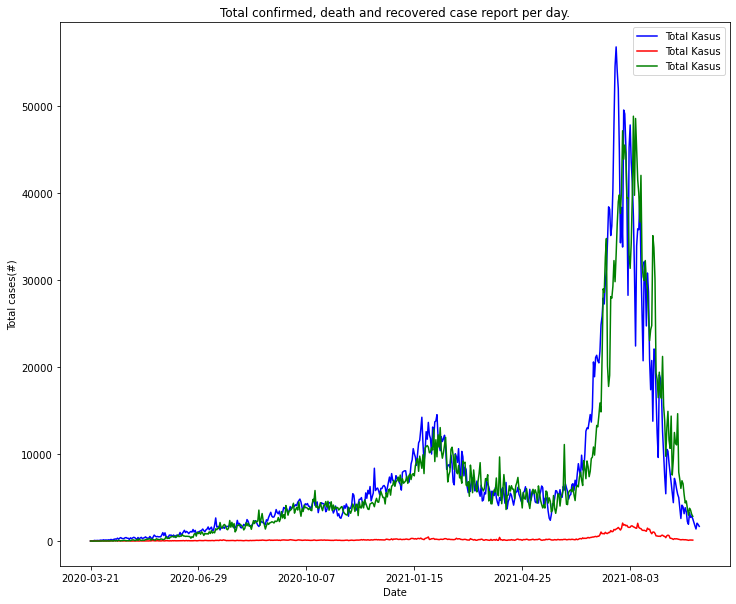

In [13]:
# Line graph that illustrates increasing infections cases per day.
df.tail()
corona_confirmed_df = df[df.Status=='Terkonfirmasi']
corona_death_df = df[df.Status=='Meninggal']
corona_recovered_df = df[df.Status=='Sembuh']

x = corona_confirmed_df['Date']
x1 = corona_death_df['Date']
x2 = corona_recovered_df['Date']
y = corona_confirmed_df['Total Kasus']
y1 = corona_death_df['Total Kasus']
y2 = corona_recovered_df['Total Kasus']

ax = plt.gca()
corona_confirmed_df.plot(kind='line', x='Date',
                          y='Total Kasus', color='blue', ax=ax)
corona_death_df.plot(kind='line', x='Date',
                          y='Total Kasus', color='red', ax=ax)
corona_recovered_df.plot(kind='line', x='Date',
                          y='Total Kasus', color='green', ax=ax)
print("Blue : Confirmed Cases ")
print("Red : Death Cases ")
print("Green : Recovered Cases ")
plt.ylabel('Total cases(#)')
plt.title('Total confirmed, death and recovered case report per day.')
plt.show()

# SPLIT

Mengambil data kasus 'Terkonfirmasi' Covid 19

In [14]:
terkonfirmasi =df[df.Status=='Terkonfirmasi']
terkonfirmasi

,Status,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Total Kasus
0,Terkonfirmasi,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1,Terkonfirmasi,2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,Terkonfirmasi,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Terkonfirmasi,2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,Terkonfirmasi,2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,Terkonfirmasi,2021-09-26,44.0,85.0,47.0,51.0,6.0,61.0,168.0,23.0,...,51.0,54.0,3.0,5.0,1.0,23.0,13.0,25.0,6.0,1760.0
1671,Terkonfirmasi,2021-09-27,63.0,67.0,24.0,36.0,1.0,60.0,103.0,11.0,...,27.0,43.0,1.0,0.0,6.0,21.0,4.0,35.0,8.0,1390.0
1674,Terkonfirmasi,2021-09-28,42.0,92.0,44.0,61.0,7.0,71.0,104.0,31.0,...,35.0,89.0,8.0,2.0,7.0,41.0,16.0,58.0,1.0,2057.0
1677,Terkonfirmasi,2021-09-29,62.0,88.0,47.0,59.0,1.0,75.0,177.0,19.0,...,39.0,61.0,2.0,10.0,7.0,23.0,23.0,55.0,1.0,1904.0


In [15]:
# Drop Tabel Status
terkonfirmasi = terkonfirmasi.drop(columns='Status', axis=1)
terkonfirmasi.head()

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Total Kasus
0,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1,2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0


In [16]:
terkonfirmasi.sort_values(by = 'Date', ascending=True, inplace=True)
## Describe data
terkonfirmasi = terkonfirmasi[['Date', 'Total Kasus']]
terkonfirmasi.set_index('Date', inplace=True)
print('Historical Covid 19 data for', terkonfirmasi.shape[0], 'days')
print('from', terkonfirmasi.index[0], 'to', terkonfirmasi.index[terkonfirmasi.shape[0]-1])
terkonfirmasi.head()

Historical Covid 19 data for 565 days
from 2020-03-15 to 2021-09-30


,Total Kasus
Date,
2020-03-15,21.0
2020-03-16,17.0
2020-03-17,0.0
2020-03-18,53.0
2020-03-19,82.0


## Visualization of Input Data

Menampilkan visualisasi data berupa plot penambahan kasus 'Terkonfirmasi' Covid 19 dari tanggal 15 Maret 2020 hingga 30 September 2021.

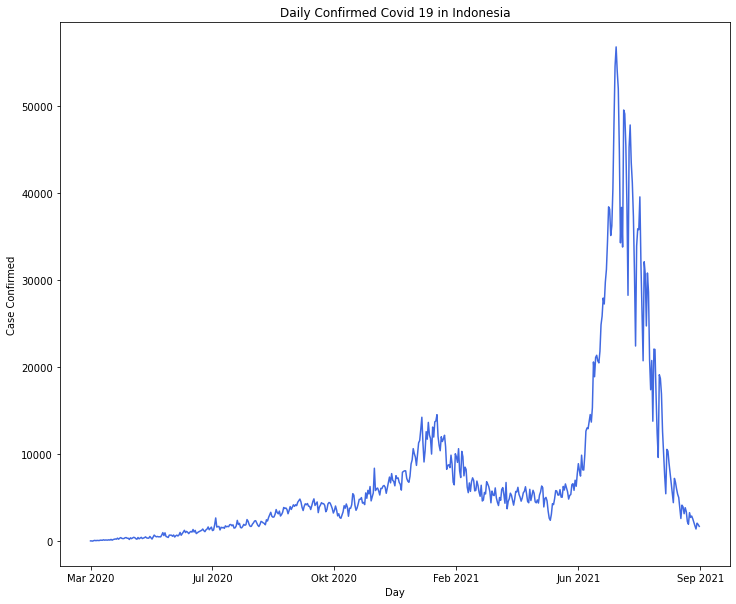

In [17]:
#Plot penambahan total kasus terkonfirmasi Covid 19 harian di Indonesia
plt.plot(terkonfirmasi.index, terkonfirmasi['Total Kasus'], color='royalblue')
plt.title('Daily Confirmed Covid 19 in Indonesia')
plt.xlabel('Day')
plt.ylabel('Case Confirmed')
plt.xticks([0, 113, 226, 339, 452, 565], ('Mar 2020','Jul 2020', 'Okt 2020', 'Feb 2021', 'Jun 2021', 'Sep 2021'))
plt.show()

In [18]:
data = terkonfirmasi.copy()

## Data Preparation
Proses untuk mempersiapkan data terdiri dari beberapa proses sebagai berikut :
- Normalisasi yaitu untuk mengubah nilai kolom numerik dalam kumpulan data ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai.
- Splitting data yaitu memisahkan data untuk proses latih dan proses untuk menguji kemampuan model yang akan di validasi mengunakan metrik regresi.

Melakukan proses normalisasi data dengan MinMaxScaler agar nilai dari dataframe berada pada rentang nilai ex [0,1]

In [19]:
# Proses normalisasi data menggunakan minmaxscaler
# Supaya nilai dari dataframe berada dalam sebuah rentang nilai ex [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
data['Total Kasus'] = min_max_scaler.fit_transform(data['Total Kasus'].values.reshape(-1,1))

data.tail()

,Total Kasus
Date,
2021-09-26,0.031009
2021-09-27,0.024490
2021-09-28,0.036242
2021-09-29,0.033547
2021-09-30,0.029776


In [20]:
# data = data.values
df1 = []
for index in range(len(data) - 31):
    df1.append(data[index: index + 31])
df1 = np.array(df1)

Melakukan partisi dataset menjadi subsection data untuk meningkatkan dimensi dari data tersebut.

In [21]:
# Fungsi untuk mempartisi dataset menjadi subsection data untuk meningkatkan dimensinya
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    #series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Melakukan proses splitting data atau memecah data ke dalam data training dan data testing sebesar 80% untuk data training (dari total jumlah data) dan 20% untuk data testing (dari total jumlah data).

In [22]:
#Splitting 80/20 untuk train 80 persen dan test 20 persen
splitRow = round(0.8 * df1.shape[0])

## Training (80%)
train = df1[:int(splitRow), :]
X_train = train[:, :-1]      # all data
y_train = train[:, -1][:,-1]
print('Training set:', train.shape[0], 'obs')

## Test (20%)
test = df1[int(splitRow):, :]
X_test = test[:, :-1]
y_test = test[:, -1][:,-1]
print('Test set:', test.shape[0], 'obs')

Training set: 427 obs
Test set: 107 obs


In [23]:
df1.shape

(534, 31, 1)

Menampilkan visualisasi data berupa plot hasil persebaran data training dengan data testing

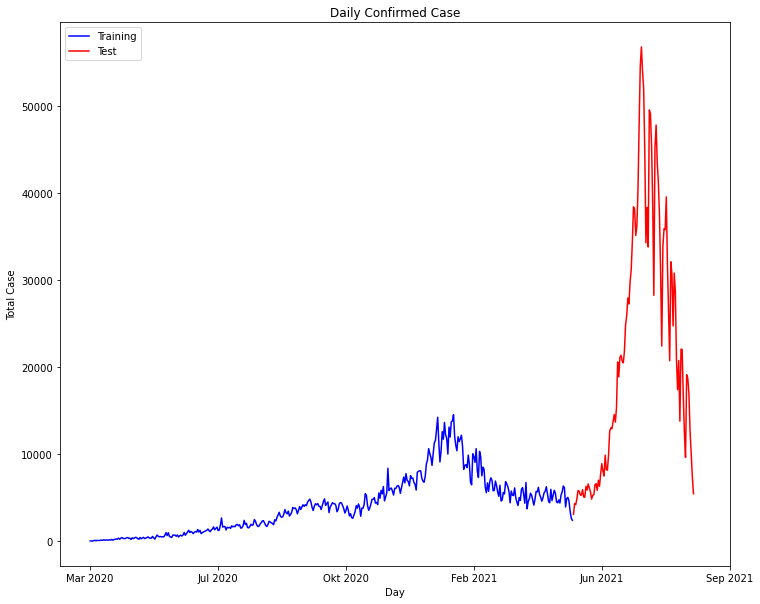

In [24]:
# Plot data untuk memeriksa data untuk training dan data untuk test
mytrain = terkonfirmasi.iloc[0:427]
mytest = terkonfirmasi.iloc[427:534]
plt.plot(mytrain.index, mytrain['Total Kasus'], color='blue', label='Training')
plt.plot(mytest.index, mytest['Total Kasus'], color='red', label='Test')
plt.xticks([0, 113, 226, 339, 452, 565], ('Mar 2020','Jul 2020', 'Okt 2020', 'Feb 2021', 'Jun 2021', 'Sep 2021'))
plt.title('Tanggal vs Total Kasus Konfirmasi')
plt.legend(loc='upper left')
plt.title('Daily Confirmed Case')
plt.xlabel('Day')
plt.ylabel('Total Case')
plt.show()

## Long Short-Term Memory

Membuat model LSTM dimana model ini berbasis jaringan syaraf tiruan dan varian dari recurrent neural network (RNN).
yang berkemampuan untuk mempelajari urutan kebergantungan dari sebuah data sekuensial.

In [25]:
X_train_r = X_train.reshape(-1, 1)
X_test_r = X_test.reshape(-1, 1)

### Training Model LSTM

In [31]:
# Partisi data train dan test untuk proses learning model tensorflow
data_x_train = windowed_dataset(X_train_r, window_size=60, batch_size=64, shuffle_buffer=1000)
data_x_test = windowed_dataset(X_test_r, window_size=60, batch_size=64, shuffle_buffer=1000)

#Definisikan model sekuensial untuk LSTM dengan 3 layer yang terdiri dari 128, 64 dan 32 unit
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True), 
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
    
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Mengatur/Set learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Menggunakan optimizer Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-8)

#Compile menggunakan metrics MAE
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [32]:
# Train model LSTM
history = model.fit(data_x_train ,batch_size = 512, epochs=20, validation_data=data_x_test, callbacks=[lr_schedule])

Epoch 1/20
200/200 [==============================] - 113s 490ms/step - loss: 0.0020 - mae: 0.0502 - val_loss: 0.0254 - val_mae: 0.1640 - lr: 1.0000e-08
Epoch 2/20
200/200 [==============================] - 85s 423ms/step - loss: 0.0016 - mae: 0.0416 - val_loss: 0.0241 - val_mae: 0.1591 - lr: 1.1220e-08
Epoch 3/20
200/200 [==============================] - 92s 458ms/step - loss: 0.0012 - mae: 0.0360 - val_loss: 0.0232 - val_mae: 0.1559 - lr: 1.2589e-08
Epoch 4/20
200/200 [==============================] - 88s 438ms/step - loss: 9.7708e-04 - mae: 0.0319 - val_loss: 0.0226 - val_mae: 0.1541 - lr: 1.4125e-08
Epoch 5/20
200/200 [==============================] - 80s 394ms/step - loss: 8.1321e-04 - mae: 0.0290 - val_loss: 0.0224 - val_mae: 0.1537 - lr: 1.5849e-08
Epoch 6/20
200/200 [==============================] - 86s 432ms/step - loss: 7.1288e-04 - mae: 0.0273 - val_loss: 0.0223 - val_mae: 0.1543 - lr: 1.7783e-08
Epoch 7/20
200/200 [==============================] - 82s 411ms/step - loss

LSTM sendiri memperoleh hasil nilai error MAE : 0.01 pada validasi data ujinya dengan akurasi R2-Squared (Coefficient Determination) sekitar 0.01 yang mengindikasikan bahwa kemampuan LSTM ini sangat rendah walaupun telah melalui beberapa improvement baseline yang sebelumnya menggunakan 1 layer dengan 128 unit neuron dengan nilai error yang masih tinggi. Kemudian dilakukan proses hyperparameter tuning dengan menambahkan 2 buah layer lstm dengan 64 dan 32 unit neuron masing-masing, kemudian ada penambahan dense layer untuk meningkatkan kompleksitas jaringannya untuk menangani rangkaian data tersebut. Hasil ini masih bisa ditingkatkan lagi karena keterbukaan jaringan syaraf tiruan yang bisa selalu ditingkatkan performanya dengan menambahkan parameter regularisasi serta jumlah unit yang berbeda sebagai faktor yang memungkinkan hasilnya bisa menjadi lebih baik dibanding SVR atau bahkan linear regression.

### Plotting the LTSM
Karena model sudah terlatih, kemudian memvisualisasi garis LSTM yang paling sesuai.

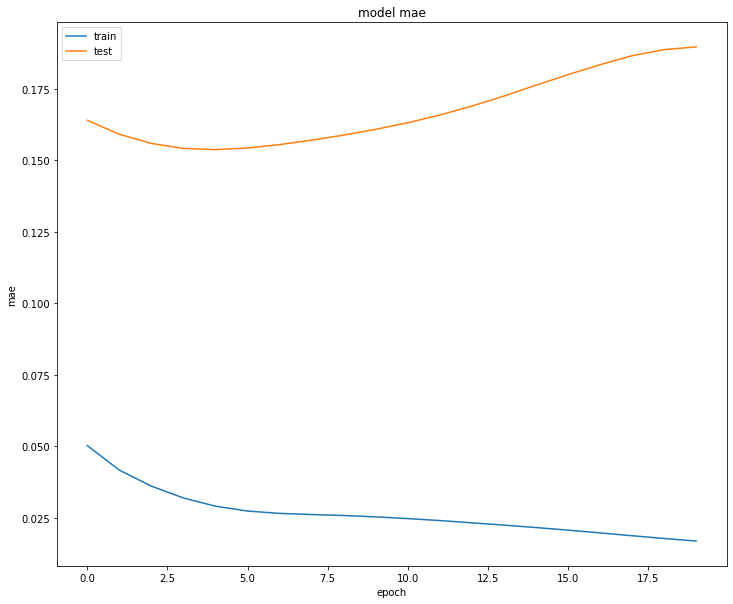

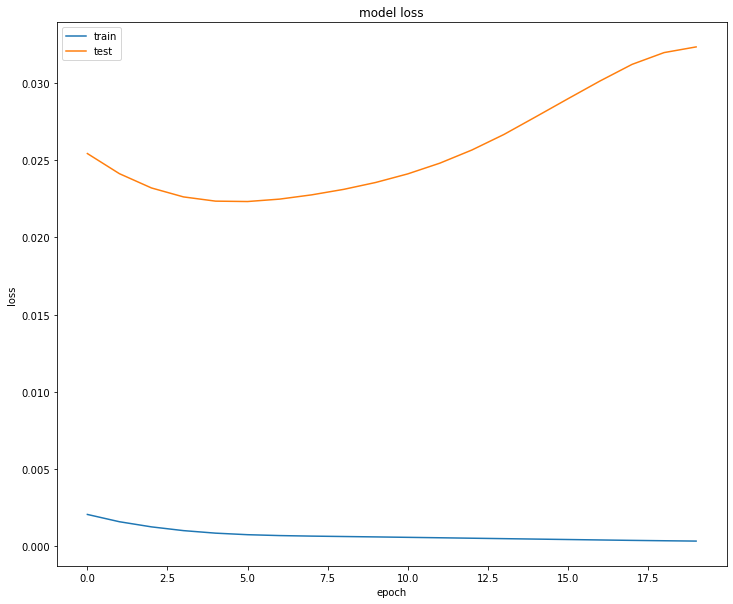

In [33]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prepocesing Algoritma Selanjutnya

In [34]:
corona_confirmed_df = df[df.Status=='Terkonfirmasi'].drop(columns='Total Kasus', axis=1)
corona_confirmed_df["Total_Kasus_Terkonfirmasi"] = corona_confirmed_df.sum(axis = 1, skipna = True)
corona_confirmed_df = corona_confirmed_df.drop(columns='Status', axis=1)
corona_confirmed_df = corona_confirmed_df.drop(columns=region, axis=1)
# corona_confirmed_df = corona_confirmed_df[corona_confirmed_df.Date ==
#                                           '21-03-2020'].reset_index().drop('index', axis=1)
# corona_confirmed_df = corona_confirmed_df.loc[(corona_confirmed_df['Date'] > '2020-03-20')]
corona_confirmed_df.head()

<ipython-input-34-dfefb19365e2>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corona_confirmed_df["Total_Kasus_Terkonfirmasi"] = corona_confirmed_df.sum(axis = 1, skipna = True)


,Date,Total_Kasus_Terkonfirmasi
0,2020-03-15,21.0
1,2020-03-16,17.0
2,2020-03-17,0.0
3,2020-03-18,53.0
4,2020-03-19,82.0


In [35]:
corona_death_df = df[df.Status=='Meninggal'].drop(columns='Total Kasus', axis=1)
corona_death_df["Total_Kasus_Meninggal"] = corona_death_df.sum(axis = 1, skipna = True)
corona_death_df = corona_death_df.drop(columns='Status', axis=1)
corona_death_df = corona_death_df.drop(columns=region, axis=1)
corona_death_df.head()

<ipython-input-35-58614234d7e1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corona_death_df["Total_Kasus_Meninggal"] = corona_death_df.sum(axis = 1, skipna = True)


,Date,Total_Kasus_Meninggal
8,2020-03-21,6.0
11,2020-03-22,10.0
14,2020-03-23,1.0
17,2020-03-24,7.0
20,2020-03-25,3.0


In [36]:
corona_recovered_df = df[df.Status=='Sembuh'].drop(columns='Total Kasus', axis=1)
corona_recovered_df["Total_Kasus_Sembuh"] = corona_recovered_df.sum(axis = 1, skipna = True)
corona_recovered_df = corona_recovered_df.drop(columns='Status', axis=1)
corona_recovered_df = corona_recovered_df.drop(columns=region, axis=1)
corona_recovered_df.head()

<ipython-input-36-cab5e894ae82>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corona_recovered_df["Total_Kasus_Sembuh"] = corona_recovered_df.sum(axis = 1, skipna = True)


,Date,Total_Kasus_Sembuh
7,2020-03-21,4.0
10,2020-03-22,9.0
13,2020-03-23,1.0
16,2020-03-24,0.0
19,2020-03-25,1.0


In [37]:
# Merge total kasus masing-masing berdasarkan tanggal

corona_diff = pd.merge(pd.merge(corona_confirmed_df, corona_death_df, on='Date'), corona_recovered_df, on='Date')
corona_diff

,Date,Total_Kasus_Terkonfirmasi,Total_Kasus_Meninggal,Total_Kasus_Sembuh
0,2020-03-21,78.0,6.0,4.0
1,2020-03-22,64.0,10.0,9.0
2,2020-03-23,61.0,1.0,1.0
3,2020-03-24,107.0,7.0,0.0
4,2020-03-25,98.0,3.0,1.0
...,...,...,...,...
554,2021-09-26,1760.0,86.0,2976.0
555,2021-09-27,1390.0,118.0,3771.0
556,2021-09-28,2057.0,124.0,3551.0
557,2021-09-29,1904.0,117.0,3077.0


In [38]:
corona_diff.isna().sum()

Date                         0
Total_Kasus_Terkonfirmasi    0
Total_Kasus_Meninggal        0
Total_Kasus_Sembuh           0
dtype: int64

In [39]:
data1 = corona_diff.copy()

In [40]:
# Add Column Mean
data1["Mean"] = data1.sum(axis = 1, skipna = True)

<ipython-input-40-f0770b9d27d6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1["Mean"] = data1.sum(axis = 1, skipna = True)


Melakukan Normalisasi data untuk model ML Support Vector Regression dan Linear Regression

In [41]:
# Normalisasi data untuk model machine learning SVR dan linreg
data1['Total_Kasus_Terkonfirmasi'] = min_max_scaler.fit_transform(data1['Total_Kasus_Terkonfirmasi'].values.reshape(-1,1))
data1['Total_Kasus_Meninggal'] = min_max_scaler.fit_transform(data1['Total_Kasus_Meninggal'].values.reshape(-1,1))
data1['Total_Kasus_Sembuh'] = min_max_scaler.fit_transform(data1['Total_Kasus_Sembuh'].values.reshape(-1,1))
data1['Mean'] = min_max_scaler.fit_transform(data1['Mean'].values.reshape(-1,1))

data1.head()

,Date,Total_Kasus_Terkonfirmasi,Total_Kasus_Meninggal,Total_Kasus_Sembuh,Mean
0,2020-03-21,0.000300,0.002418,0.000082,0.000265
1,2020-03-22,0.000053,0.004352,0.000184,0.000212
2,2020-03-23,0.000000,0.000000,0.000020,0.000000
3,2020-03-24,0.000811,0.002901,0.000000,0.000541
4,2020-03-25,0.000653,0.000967,0.000020,0.000413


Melakukan proses splitting data atau memecah data ke dalam data training dan data testing sebesar 80% untuk data training (dari total jumlah data) dan 20% untuk data testing (dari total jumlah data).

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(data1[['Total_Kasus_Terkonfirmasi', 'Total_Kasus_Meninggal', 'Total_Kasus_Sembuh']], data1[['Mean']], test_size=0.2)

In [43]:
X_train.shape, X_test.shape

((447, 3), (112, 3))

## Linear Regression

Membuat Model Linear Regression dimana model ini merupakan algoritma yang melakukan pemodelan dari hubungan dua variabel dengan proses fitting 
equasi linear terhadap data yang diobservasi. Model ini digunakan untuk memprediksi nilai suatu variable berdasarkan nilai dari variable
lainnya. Nilai yang diprediksi merupakan variabel yang dependen, sedangkan nilai variable yang digunakan untuk memprediksi merupakan 
variabel independen. 

In [44]:
# Buat model Linear Regression
model_lr = LinearRegression()
# Train model Linear Regression
model_lr.fit(X_train, y_train)
#Prediksi menggunakan data uji
y_pred_lr = model_lr.predict(X_test)

Menghitung performa dari model Linear Regression

In [46]:
# Hitung performa akurasi dari model
r2_lr = r2_score(y_test,y_pred_lr)
print('R2 score (Coefficient of Determination):',r2_lr)

# Hitung error dari model menggunakan mean absolute error (mae)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("MAE :", mae_lr)

R2 score (Coefficient of Determination): 1.0
MAE : 7.589608814929332e-17


Linear Regression menggunakan default parameter boolean terbaik untuk datanya dengan memberikan error MAE sebesar : 1.0 dengan
akurasi menggunakan R2 Score (Coefficient Determination) sebesar : 7.589608814929332e-17, dari 2 metrik ini mengindikasikan bahwa hasil prediksi dari 
Linear Regresion lebih akurat dibandingkan dari LSTM dan SVR.

## Support Vector Regression (SVR)

Membuat model Support Vector Regression dimana mekanisme dari SVR ini yaitu dengan mencari garis fit terbaik atau sebuah hyperplane yang dianggap
paling optimal dalam memprediksi nilai-nilai dari data kontinu dengan memetakan data yang terurut dengan pemisahan data berdasarkan
margin (hyperplane) terbaik.

In [48]:
#Buat model Support Vector Regressor (SVR)
model_svr = SVR(C = 0.5, kernel = 'linear', degree = 10, coef0=1,tol=1e-3,cache_size=4096,gamma=0.7)
#Train model SVR
model_svr.fit(X_train, y_train)
#Prediksi menggunakan data uji
y_pred_svr = model_svr.predict(X_test)

c:\users\yusriyah\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Menghitung performa dari model Support Vector Reggresion

In [49]:
# Hitung performa akurasi dari model
r2_svr = r2_score(y_test,y_pred_svr)
print('R2 score (Coefficient of Determination):', r2_svr)

# Hitung error dari model menggunakan mean absolute error (mae)
mae_svr = mean_absolute_error(y_test,y_pred_svr)
print("MAE :",mae_svr)

R2 score (Coefficient of Determination): 0.8581134418888139
MAE : 0.06723574658417841


# Membandingkan Hasil Masing-Masing Model Prediksi


In [61]:
banding_dict = {'LTSM': val_mae,
          'Linear_Regression': r2_lr,
          'Support_Vector_Regression':r2_svr}
banding_dict = pd.DataFrame.from_dict(
    banding_dict, orient='index', columns=['Accuracy'])

banding_dict.style.background_gradient(cmap='Blues')

,Accuracy
LTSM,0.189600
Linear_Regression,1.000000
Support_Vector_Regression,0.858113


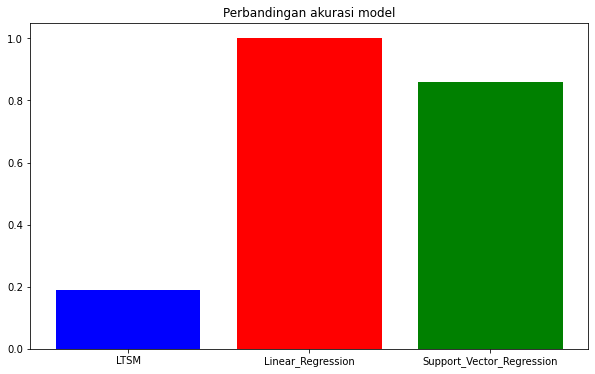

In [62]:
# Graphic perbandingan akurasi Model
banding_dict = banding_dict.head(3)
x = banding_dict.index
y = banding_dict['Accuracy'].values

plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(x, y, color=['blue', 'red', 'green'])
plt.title('Perbandingan akurasi model')
plt.show()